<a href="https://colab.research.google.com/github/SebastianBentert/example_code/blob/main/bingbu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, stdev
from itertools import combinations
import numpy as np
from scipy.stats import shapiro, mannwhitneyu, ttest_ind

In [9]:
def bing(x,y):
  """
  First performs a shapiro test, afterwards either t-test or u-test.
  Takes two lists as input
  """
  dall = x+y
  _, p = shapiro(dall)
  if p <= 0.05:
    _, p2 = mannwhitneyu(x, y)
    if p2 <= 0.05:
      print(f'Normalverteilung\nDaten sind unterschiedlich\nshapiro P-Wert = {round(p,3)}, U-Test P-wert = {round(p2,3)}')
    else:
      print(f'Normalverteilung\nDaten sind nicht unterschiedlich\nshapiro P-Wert = {round(p,3)}, U-Test P-wert = {round(p2,3)}')
  else:
    _, p2 = ttest_ind(x, y)
    if p2 <= 0.05:
      print(f'keine Normalverteilung\nDaten sind unterschiedlich\nshapiro P-Wert = {round(p,3)}, T-Test P-wert = {round(p2,3)}')
    else:
      print(f'kein Normalverteilung\nDaten sind nicht unterschiedlich\nshapiro P-Wert = {round(p,3)}, T-Test P-wert = {round(p2,3)}')
    

In [10]:
def bing2(unb=BWUNB,u=BWU,ue=BWUE,e=BWE,vf=VF,unb2=LPUNB,u2=LPU,ue2=LPUE,e2=LPE,c=C):
  '''
  Alle 4 tests (unbehandelt, U, UE, E)
  '''
  df = pd.DataFrame(data=[[unb,unb2,mean(unb),stdev(unb),mean(unb2),stdev(unb2)],[u,u2,mean(u),stdev(u),mean(u2),stdev(u2)],[ue,ue2,mean(ue),stdev(ue),mean(ue2),stdev(ue2)],[e,e2,mean(e),stdev(e),mean(e2),stdev(e2)]],
                    index=['unb','U','UE','E'],
                    columns=['Messungen Blindwert','Messungen LPl','BW mean','BW std','LPl mean','LPl std'])
  df['bw']=df['LPl mean']-df['BW mean']
  df['VF']=vf
  df['absorb']=df['bw']*df['VF']
  df['protein g/L'] = (df['bw']-0.0068)/0.054
  df['Protein mit VF g/L'] = df['protein g/L']*df['VF']
  df['Protein %'] = df['Protein mit VF g/L']/10
  fig = plt.figure(figsize=(10,7))
  ax = df['Protein %'].plot(kind='bar',yerr=df['LPl std']/df['LPl mean']*df['Protein %'])
  plt.title('Proteingehalt %')
  for p in ax.patches:
    ax.annotate('{:.2f}'.format(round(p.get_height(),2))+'%', (p.get_x()+0.05, p.get_height() +0.1))
  print(df.T)

  #shapiro tests
  unbshapiro = [(((np.array(df['Messungen LPl']['unb'])-np.array(df['Messungen Blindwert']['unb']))-0.0068)/0.054)*df['VF']['unb'],'unbehandelt']
  Ushapiro = [(((np.array(df['Messungen LPl']['U'])-np.array(df['Messungen Blindwert']['U']))-0.0068)/0.054)*df['VF']['U'],'U']
  UEshapiro = [(((np.array(df['Messungen LPl']['UE'])-np.array(df['Messungen Blindwert']['UE']))-0.0068)/0.054)*df['VF']['UE'],'UE']
  Eshapiro = [(((np.array(df['Messungen LPl']['E'])-np.array(df['Messungen Blindwert']['E']))-0.0068)/0.054)*df['VF']['E'],'E']
  for x,y in combinations([unbshapiro,Ushapiro,UEshapiro,Eshapiro],2):
    print(f'\nVergleich von {x[1]} und {y[1]}:')
    print(x[0],y[0])
    bing(x[0],y[0])

  df.index = df.index+' '+str(c)
  df.to_excel('test.xlsx')
  fig.savefig('pic')

                                       unb  ...                      E
Messungen Blindwert     [0.15, 0.15, 0.15]  ...     [0.15, 0.15, 0.15]
Messungen LPl        [0.343, 0.348, 0.344]  ...  [0.347, 0.349, 0.349]
BW mean                               0.15  ...                   0.15
BW std                                   0  ...                      0
LPl mean                             0.345  ...               0.348333
LPl std                         0.00264575  ...              0.0011547
bw                                   0.195  ...               0.198333
VF                                      30  ...                     30
absorb                                5.85  ...                   5.95
protein g/L                        3.48519  ...                3.54691
Protein mit VF g/L                 104.556  ...                106.407
Protein %                          10.4556  ...                10.6407

[12 rows x 4 columns]

Vergleich von unbehandelt und U:
[103.44444444 106.22

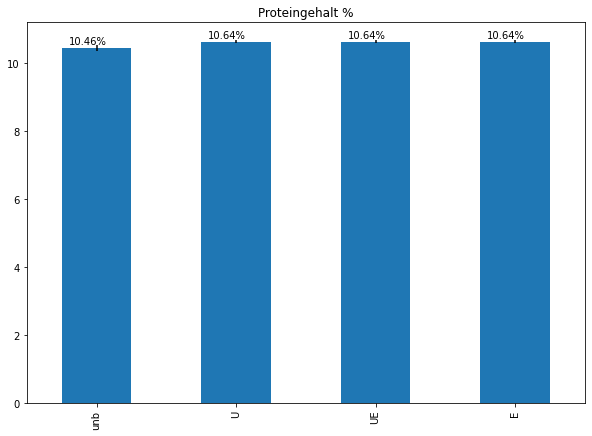

In [11]:
BWUNB=[0.148,0.146,0.146]
BWU=[0.15,0.15,0.15]
BWUE=[0.148,0.146,0.146]
BWE=[0.15,0.15,0.15]
LPUNB=[0.343,0.348,0.344]
LPU=[0.390,0.391,0.382]
LPUE=[0.347,0.349,0.349]
LPE=[0.319,0.319,0.316]
C = 15
VF = C/0.5
bing2()

In [15]:
def bing3(LPl,BW,names,vf=VF,c=C):
  df = pd.DataFrame(columns=['Messungen Blindwert','Messungen LPl','BW mean','BW std','LPl mean','LPl std'])
  print(df)
  for i in range(len(LPl)):
    df.loc[names[i]] = [BW[i],LPl[i],mean(BW[i]),stdev(BW[i]),mean(LPl[i]),stdev(LPl[i])]
  print(df)
  df['bw']=df['LPl mean']-df['BW mean']
  df['VF']=vf
  df['absorb']=df['bw']*df['VF']
  df['protein g/L'] = (df['bw']-0.0068)/0.054
  df['Protein mit VF g/L'] = df['protein g/L']*df['VF']
  df['Protein %'] = df['Protein mit VF g/L']/10
  fig = plt.figure(figsize=(10,7))
  ax = df['Protein %'].plot(kind='bar',yerr=df['LPl std']/df['LPl mean']*df['Protein %'])
  plt.title('Proteingehalt %')
  for p in ax.patches:
    ax.annotate('{:.2f}'.format(round(p.get_height(),2))+'%', (p.get_x()+0.05, p.get_height() +0.1))
  print(df.T)
  d = {}
  for index, row in df.iterrows():
    d[index] = list((((np.array(df['Messungen LPl'][index])-np.array(df['Messungen Blindwert'][index]))-0.0068)/0.054)*df['VF'][index])
  print(d)
  
  print([key for key in d])
  for x,y in combinations([key for key in d],2):
    print(f'\nVergleich von {x} und {y}:')
    bing(d[x],d[y])
  df.index = df.index+' '+str(c)
  df.to_excel('test2.xlsx')
  fig.savefig('pic2')

Empty DataFrame
Columns: [Messungen Blindwert, Messungen LPl, BW mean, BW std, LPl mean, LPl std]
Index: []
         Messungen Blindwert          Messungen LPl  ...  LPl mean   LPl std
14.7.  [0.148, 0.146, 0.146]  [0.347, 0.349, 0.349]  ...  0.348333  0.001155
10.7.     [0.15, 0.15, 0.15]  [0.358, 0.349, 0.347]  ...  0.351333  0.005859

[2 rows x 6 columns]
                                     14.7.                  10.7.
Messungen Blindwert  [0.148, 0.146, 0.146]     [0.15, 0.15, 0.15]
Messungen LPl        [0.347, 0.349, 0.349]  [0.358, 0.349, 0.347]
BW mean                           0.146667                   0.15
BW std                           0.0011547                      0
LPl mean                          0.348333               0.351333
LPl std                          0.0011547             0.00585947
bw                                0.201667               0.201333
VF                                      30                     30
absorb                                6.05   

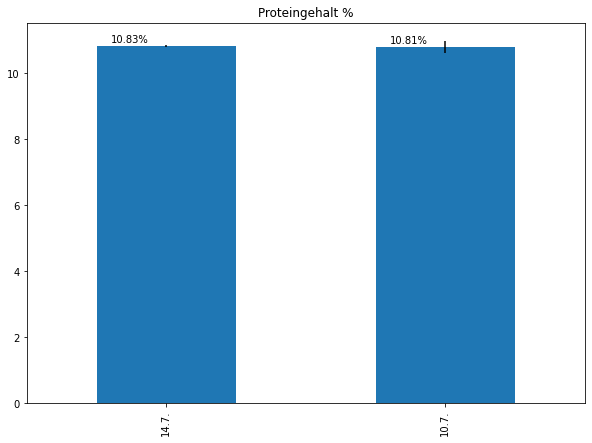

In [16]:
VF = C/0.5
UE1410BW = [0.148,0.146,0.146]
UE1410LP = [0.347,0.349,0.349]
UE0710BW = [0.15,0.15,0.15]
UE0710LP = [0.358,0.349,0.347]
datenLPl=[UE1410LP,UE0710LP]
datenBW=[UE1410BW,UE0710BW]
datennamen = ['14.7.','10.7.']
C = 15
VF = C/0.5
bing3(datenLPl,datenBW,datennamen)

In [17]:
def Trübung(unb=BWUNB,u=BWU,ue=BWUE,e=BWE,vf=VF,unb2=LPUNB,u2=LPU,ue2=LPUE,e2=LPE):
  unb,u,ue,e,unb2,u2,ue2,e2 = np.array(unb),np.array(u),np.array(ue),np.array(e),np.array(unb2),np.array(u2),np.array(ue2),np.array(e2)
  df = pd.DataFrame(data=[[unb,unb2,mean(unb),stdev(unb),mean(unb2),stdev(unb2)],[u,u2,mean(u),stdev(u),mean(u2),stdev(u2)],[ue,ue2,mean(ue),stdev(ue),mean(ue2),stdev(ue2)],[e,e2,mean(e),stdev(e),mean(e2),stdev(e2)]],
                    index=['unb','U','UE','E'],
                    columns=['Absorbtion Blindwert','Absorbtion LPl','BW mean','BW std','LPl mean','LPl std'])
  df['Transmission% LPl'] = (10**-df['Absorbtion LPl'])*100
  df['Transmission% LPl mean'] = (10**-df['LPl mean'])*100
  df['Transmission% BW'] = (10**-df['Absorbtion Blindwert'])*100
  df['Transmission% BW mean'] = (10**-df['BW mean'])*100
  df['Transmission Effektiv%'] = (df['Transmission% LPl mean']/df['Transmission% BW mean'])*100
  df['Trübung%'] = 100 - df['Transmission Effektiv%']
  print(df.T)
  fig = plt.figure(figsize=(10,7))
  ax = df['Trübung%'].plot(kind='bar')
  plt.title('Trübung%')
  for p in ax.patches:
    ax.annotate('{:.2f}'.format(round(p.get_height(),2))+'%', (p.get_x()+0.05, p.get_height() +0.1))
  df.to_excel('test3.xlsx')
  fig.savefig('pic3')

                                                                      unb  ...                                                  E
Absorbtion Blindwert                                [0.148, 0.146, 0.146]  ...                                 [0.15, 0.15, 0.15]
Absorbtion LPl                                      [0.343, 0.348, 0.344]  ...                              [0.319, 0.319, 0.316]
BW mean                                                          0.146667  ...                                               0.15
BW std                                                          0.0011547  ...                                                  0
LPl mean                                                            0.345  ...                                              0.318
LPl std                                                        0.00264575  ...                                         0.00173205
Transmission% LPl       [45.39416166502031, 44.874538993313216, 45.289...  ...  [47.973344

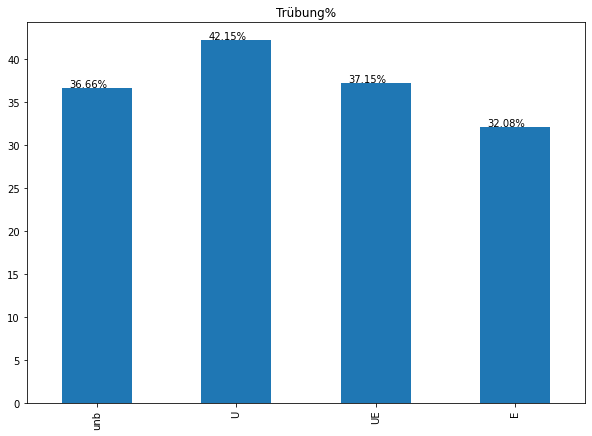

In [18]:
BWUNB=[0.057,0.058,0.056]
BWU=[0.056,0.055,0.059]
BWUE=BWUNB
BWE=BWU
LPUNB=[0.087,0.087,0.086]
LPU=[0.145,0.145,0.145]
LPUE=[0.184,0.183,0.183]
LPE=[0.099,0.183,0.183]
Trübung()